# Plotting GIA maps 
This script is designed to plot the Relative Sea Level as predicted by different GIA models, that are contained into a folder called "All_GIA_models". Currently, this folder contains 54 different solutions, calculating GIA predictions using a suite of combinations of ice-sheets and solid Earth models. The Earth’s mantle is discretized in two layers: Upper and Lower Mantle (respectively, UL and LM). Each mantle viscosity profile is combined with a perfectly elastic lithosphere whose thickness is set to either 60, 90 or 120 km. Six mantle viscosities are used for each lithospheric thickness, as shown in the table below. We combine the Earth models with three different models: ICE5g, ICE6g (Peltier et al., 2015;Peltier, 2009) and ANICE (De Boer et al., 2015;De Boer et al., 2017). In total, we ran 54 different ice-earth model combinations (3 ice sheet models × 3 lithospheric thicknesses × 6 mantle viscosity profiles).

<br>
<center>Table 1: Upper and lower mantle viscosities for the different earth models</center>

| Model name | Upper Mantle [Pa s 10^21] | Lower Mantle [Pa s 10^21] |
|------------|--------------------------|--------------------------|
| VM1        | 0.25                     | 2.5                      |
| VM2        | 0.25                     | 5.0                      |
| VM3        | 0.25                     | 10                       |
| VM4        | 0.5                      | 2.5                      |
| VM5        | 0.5                      | 5                        |
| VM6        | 0.5                      | 10                       |

First, select which model you wish to plot and the time from the dropdown menus below.


In [5]:
import ipywidgets as widgets
import os

#Retrieve file names from the GIA models folder
path = 'All_GIA_models'
folder = os.fsencode(path)
filenames = []
for file in os.listdir(folder):
    filename = os.fsdecode(file)
    if filename.endswith( ('.nc') ):
        filenames.append(filename)
filenames.sort()

#Select which model you want to map
Dropdown=widgets.Dropdown(
    options=filenames,
    value='aniceselen-visco1-120km.nc',
    description='GIA model:',
    disabled=False)


Age=widgets.SelectionSlider(
    options=['-0.0', '-1.0', '-2.0', '-3.0','-4.0','-5.0','-6.0','-7.0','-8.0','-9.0','-10.0'
             ,'-11.0','-12.0','-13.0','-14.0','-15.0','-16.0'],
    value='-0.0',
    description='Age (Ka)',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True
)

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        print ("changed to %s" % change['new'])

Dropdown.observe(on_change)
Age.observe(on_change)

display(Dropdown, Age)

Dropdown(description='GIA model:', options=('aniceselen-visco1-120km.nc', 'aniceselen-visco1-60km.nc', 'anices…

SelectionSlider(continuous_update=False, description='Age (Ka)', options=('-0.0', '-1.0', '-2.0', '-3.0', '-4.…

changed to -1.0
changed to ice6g-visco6-60km.nc


After changing the GIA model and time constraint, re-run the cell below and update the map.

Text(0.5, 1.0, 'RSL predicted by model ice6g-visco6-60km.nc at -1.0 ka')

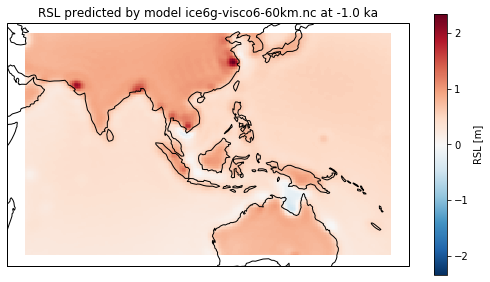

In [7]:
#Take the value from the dropdown list
GIAmap=Dropdown.value
time=Age.value

#Open the selected Netcdf
import xarray as xr
ncfile='All_GIA_models/'+ GIAmap
ds = xr.open_dataset(ncfile)

#Plot the map
import cartopy.crs as ccrs
import cartopy
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
RSL = ds.RSL.sel(t=time, method='nearest')
fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
RSL.plot(ax=ax, transform=ccrs.PlateCarree(),cbar_kwargs={'shrink': 0.8})
plt.title('RSL predicted by model {} at {} ka'.format(str(GIAmap),str(time)))

**Main code help from:**<br>
https://rabernat.github.io/research_computing_2018/maps-with-cartopy.html<br>
https://stackoverflow.com/questions/46615651/numpy-mean-of-mixing-layer-height-from-multiple-netcdf-files<br>

**Reference**<br>
This script is part of the Supplementary material of Bender et al., Climate of the Past, Under rev.

**Acknowledgments**<br>
This work was supported through grant SEASCHANGE (RO-5245/1-1) from the Deutsche Forschungsgemeinschaft (DFG) as part of the Special Priority Program (SPP)-1889 “Regional Sea Level Change and Society”